In [1]:
from operators import *
from backtest import *
import pandas as pd
import numpy as np
import os
from typing import Iterable
#import alphalens as als
import quantstats as qs
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import matplotlib.pyplot as mp

qs.extend_pandas()

target_folder_path = rf'/Users/tedting/Documents/Alpha/data'
%cd "{target_folder_path}"

/Users/tedting/Documents/Alpha/data


/Users/tedting/anaconda3/envs/quant39/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
future_close = pd.read_pickle('/Users/tedting/Documents/Alpha/data/future_close.pkl')
future_filter = future_close.notna().loc['2010-02-01':'2023-11-30']

adj_open = pd.read_pickle(rf'{target_folder_path}/adj_open.pkl').loc['2010-02-01':'2023-11-30']
Close = pd.read_pickle(rf'{target_folder_path}/收盤價(元).pkl').loc['2010-02-01':'2023-11-30']
Volume = pd.read_pickle(rf'{target_folder_path}/成交量(千股).pkl').loc['2010-02-01':'2023-11-30']
ZTXA = pd.read_pickle(rf'{target_folder_path}/ZTXA_close.pkl').loc['2010-02-01':'2023-11-30']
Benchmark = ZTXA['ZTXA 台指近月期貨指數'].pct_change().shift(-2)

In [3]:
投信持股數市值 = pd.read_pickle(rf'{target_folder_path}/data_daily/投信持股數市值(百萬).pkl').loc['2010-02-01':'2023-11-30']

In [4]:
import pandas as pd

def get_common_columns(dataframes):
    # 确保提供的是一个列表且列表不为空
    if not isinstance(dataframes, list) or not dataframes:
        return []

    # 检查列表中的所有元素都是DataFrame
    if not all(isinstance(df, pd.DataFrame) for df in dataframes):
        raise ValueError("All elements in the list must be pandas DataFrames.")

    # 使用集合的交集操作找出共有的列
    common_columns = set.intersection(*(set(df.columns) for df in dataframes))

    # 过滤每个DataFrame，只保留共有的列
    filtered_dfs = [df[list(common_columns)] for df in dataframes]

    return filtered_dfs

# 示例使用
dataframes = [future_filter, adj_open, Close, Volume, 投信持股數市值]
common_columns_dfs = get_common_columns(dataframes)

future_filter, adj_open, Close, Volume, 投信持股數市值 = common_columns_dfs

for i in dataframes:
    i = i[future_filter]

In [5]:
exp_returns = adj_open.pct_change().shift(-2)

/var/folders/fx/jn0gghjd4cg68lr15nlpsbqr0000gn/T/ipykernel_14381/4033474230.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  exp_returns = adj_open.pct_change().shift(-2)


In [9]:
# GrossProfitGrowthRate = pd.read_pickle(rf'/Users/tedting/Documents/Alpha/OFFICIAL_data_2/GrossProfitGrowthRate_q_90%.pkl')
# REV_m = pd.read_pickle(rf'/Users/tedting/Documents/Alpha/OFFICIAL_data_2/REV_m_90%.pkl')
# REV_G_m = pd.read_pickle(rf'/Users/tedting/Documents/Alpha/OFFICIAL_data_2/REV_G_m_90%.pkl')


In [6]:
Volume_y_avg = Volume.rolling(252).mean()
Close_y_avg = Close.rolling(252).mean()
heavy_Filter = Close_y_avg < 1000 
Volume_Filter = Volume_y_avg > 200
trade_volume_Filter = Close_y_avg * Volume_y_avg > 60000
small_aum_Filter = Volume_Filter & trade_volume_Filter
small_aum_Filter2 = Volume_Filter & trade_volume_Filter & heavy_Filter # & Limit

/Users/tedting/Documents/Alpha/backtest.py:109: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  peak = LS_compound[0]


             Sharpe Ratio  Annualized Ret  Max Drawdown  Turnover       Std  \
Performance       -0.3769       -0.101807      0.849104  0.026039  0.013909   

                   IC        IR  
Performance  0.002864  0.021199  


/Users/tedting/anaconda3/envs/quant39/lib/python3.9/site-packages/quantstats/utils.py:269: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  benchmark = benchmark_prices.reindex(new_index, method='bfill') \
/Users/tedting/anaconda3/envs/quant39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Users/tedting/anaconda3/envs/quant39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a s

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2010-02-01  2010-02-01
End Period                 2023-11-30  2023-11-30
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      100.0%

Cumulative Return          -12.21%     131.88%
CAGR﹪                     -0.94%      6.27%

Sharpe                     -0.02       0.46
Prob. Sharpe Ratio         46.71%      95.13%
Smart Sharpe               -0.02       0.33
Sortino                    -0.03       0.63
Smart Sortino              -0.02       0.45
Sortino/√2                 -0.02       0.44
Smart Sortino/√2           -0.02       0.32
Omega                      1.0         1.0

Max Drawdown               -33.35%     -31.51%
Longest DD Days            3020        1225
Volatility (ann.)          11.84%      16.82%
R^2                        0.2         0.2
Information Ratio          -0.03       -0.03
Calmar                     -0.03      

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2015-08-24,2023-10-27,2023-11-30,3020,-33.350079,-32.486181
2,2011-11-23,2012-03-02,2015-06-08,1293,-12.117480,-11.170000
3,2010-04-14,2010-06-07,2010-09-10,149,-7.004444,-6.617627
4,2011-08-08,2011-09-22,2011-11-18,102,-6.206538,-5.881876
5,2015-06-09,2015-07-16,2015-07-24,45,-4.314347,-4.157043


/Users/tedting/anaconda3/envs/quant39/lib/python3.9/site-packages/quantstats/utils.py:269: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  benchmark = benchmark_prices.reindex(new_index, method='bfill') \


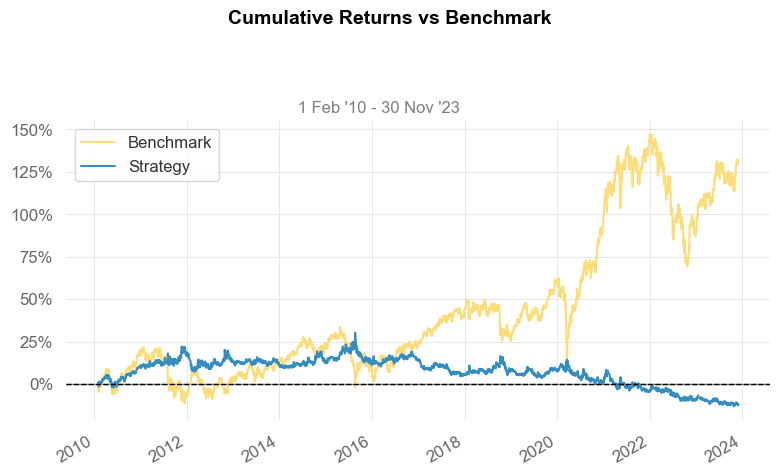

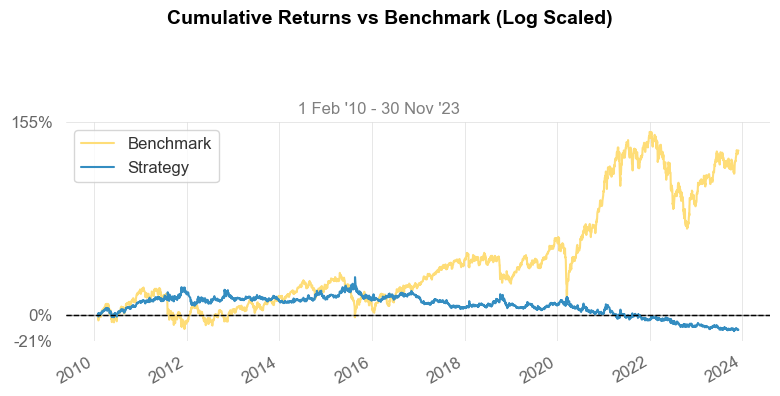

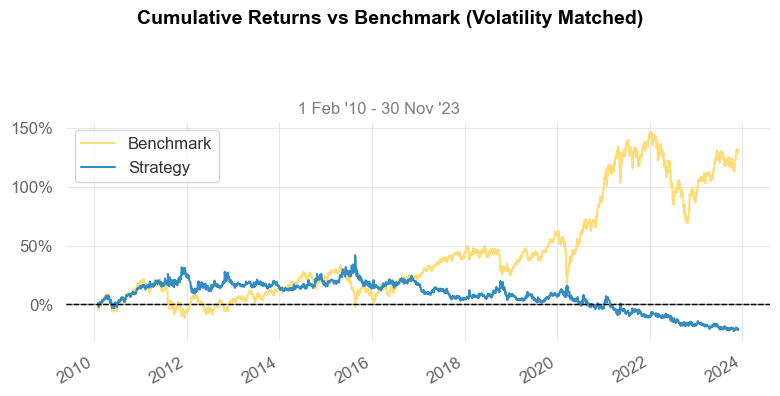

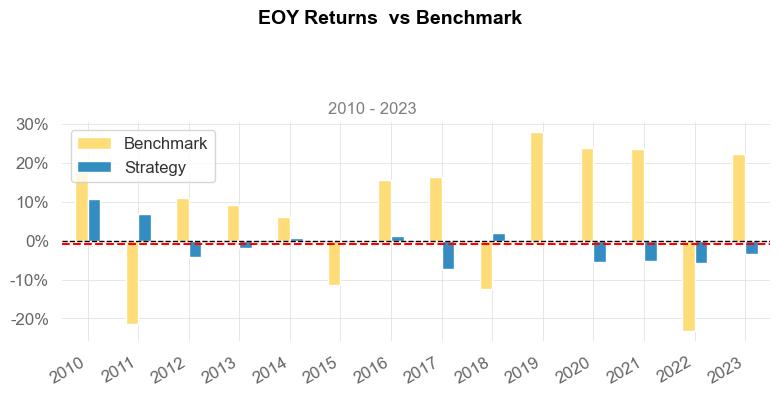

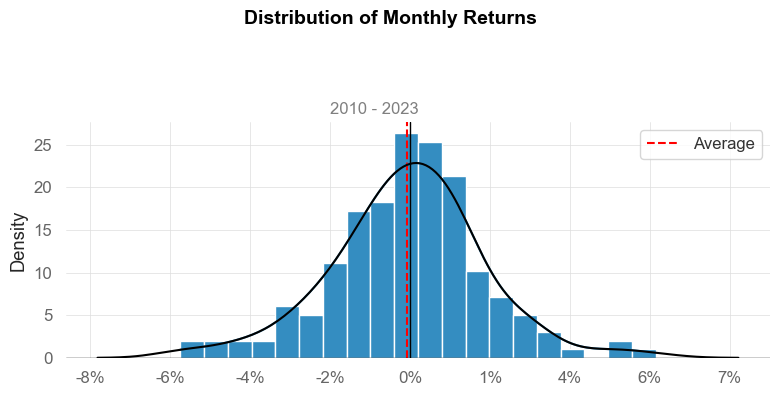

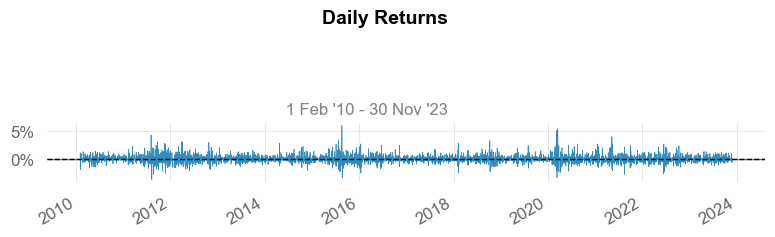

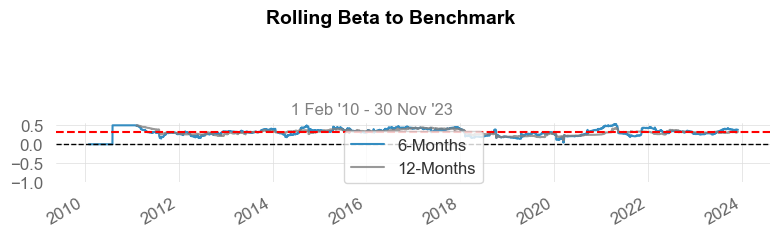

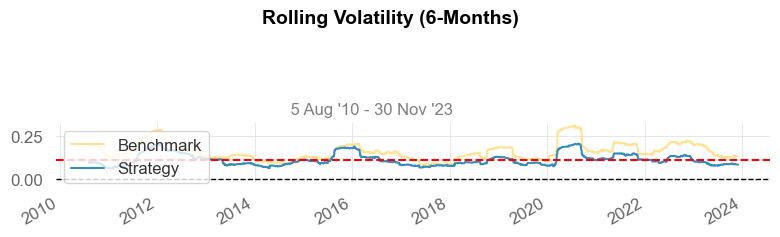

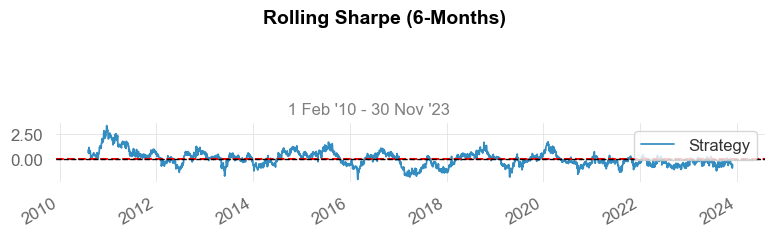

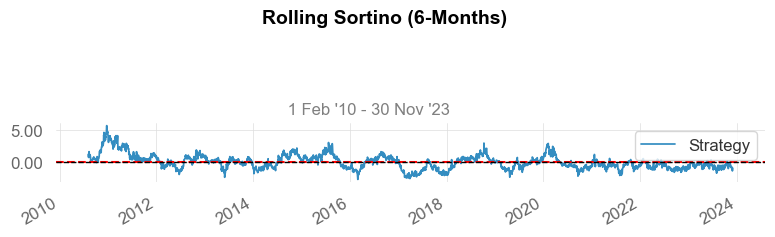

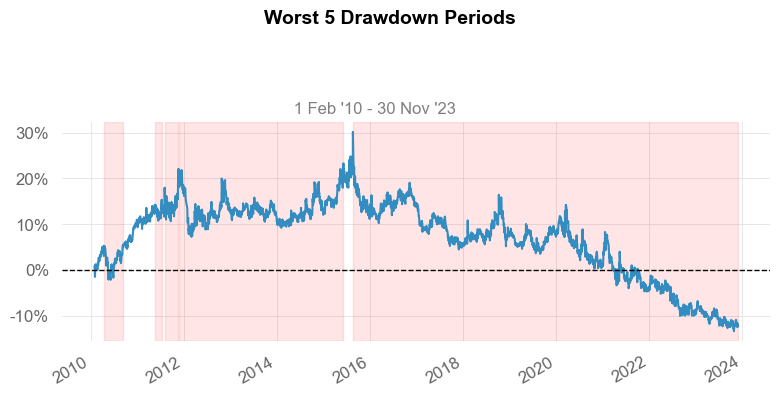

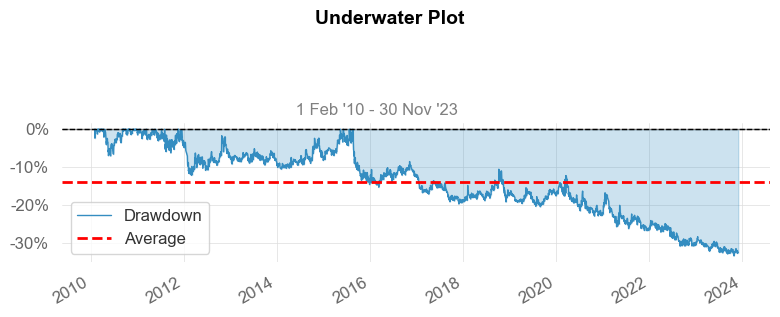

TypeError: pivot() takes 1 positional argument but 4 were given

In [9]:
i = 'cs_rank( 投信持股數市值 )'
alpha = eval(i)[small_aum_Filter]
LS_result, result_summary = bt(alpha, exp_returns,
                            strategy = 'SO',
                            buy_fee=0.001425*0.3, sell_fee=0.001425*0.3+0.003,
                            start_time='2010-01-01',
                            end_time='2023-12-31')
print(result_summary)
qs.reports.full((LS_result+Benchmark)/2,Benchmark)

date
2010-02-01    0.0
2010-02-02    0.0
2010-02-03    0.0
2010-02-04    0.0
2010-02-05    0.0
             ... 
2023-11-24   -1.0
2023-11-27   -1.0
2023-11-28   -1.0
2023-11-29   -1.0
2023-11-30   -1.0
Length: 3398, dtype: float64


/var/folders/fx/jn0gghjd4cg68lr15nlpsbqr0000gn/T/ipykernel_32370/1024974347.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  top_equalweight = top.applymap(lambda x: -1/stocks if x != 0 else 0)


/Users/tedting/anaconda3/envs/quant39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Users/tedting/anaconda3/envs/quant39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Users/tedting/anaconda3/envs/quant39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass ax

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2010-05-10  2010-05-10
End Period                 2023-11-30  2023-11-30
Risk-Free Rate             0.0%        0.0%
Time in Market             95.0%       100.0%

Cumulative Return          -90.63%     129.25%
CAGR﹪                     -16.01%     6.31%

Sharpe                     -0.54       0.46
Prob. Sharpe Ratio         2.58%       95.08%
Smart Sharpe               -0.54       0.45
Sortino                    -0.81       0.63
Smart Sortino              -0.8        0.62
Sortino/√2                 -0.57       0.45
Smart Sortino/√2           -0.56       0.44
Omega                      0.91        0.91

Max Drawdown               -94.03%     -31.51%
Longest DD Days            4049        1225
Volatility (ann.)          26.48%      16.76%
R^2                        0.07        0.07
Information Ratio          -0.04       -0.04
Calmar                     -0.17    

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2012-10-29,2023-10-05,2023-11-30,4049,-94.031299,-93.891540
2,2011-11-23,2012-02-21,2012-10-26,338,-41.162447,-40.468164
3,2011-08-08,2011-08-15,2011-11-10,94,-13.125495,-12.381010
4,2011-03-16,2011-04-25,2011-07-11,117,-11.616442,-11.245869
5,2011-07-14,2011-07-29,2011-08-03,20,-9.852628,-8.452797


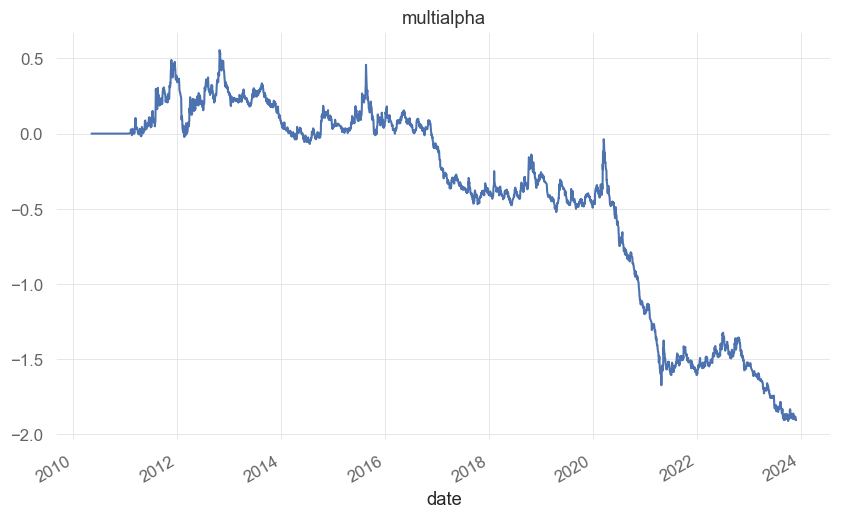

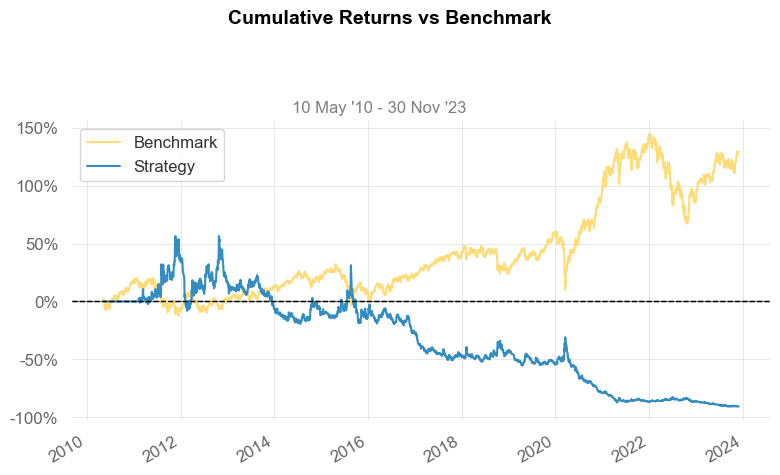

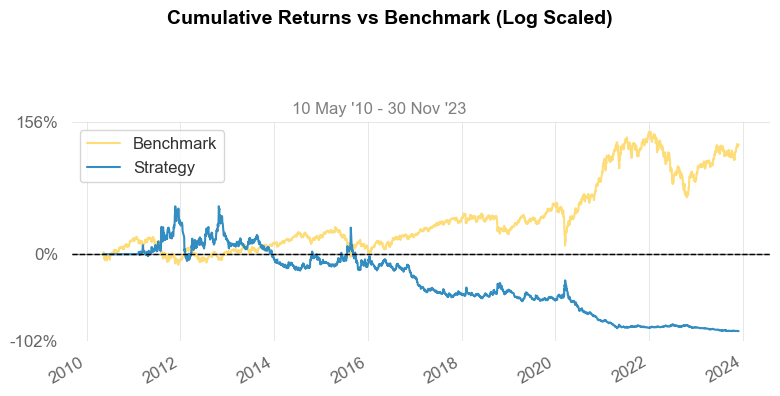

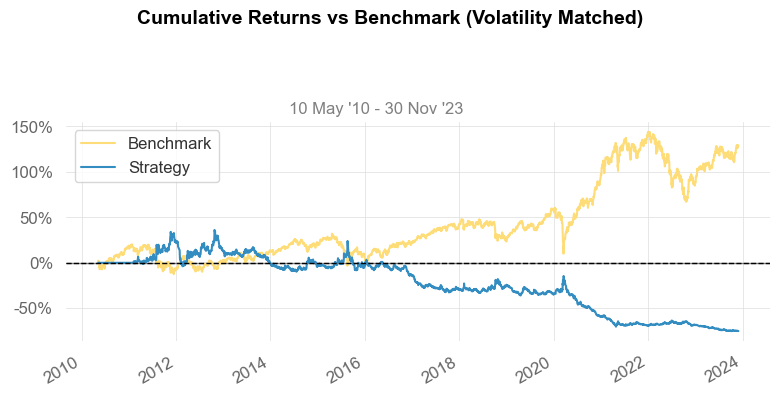

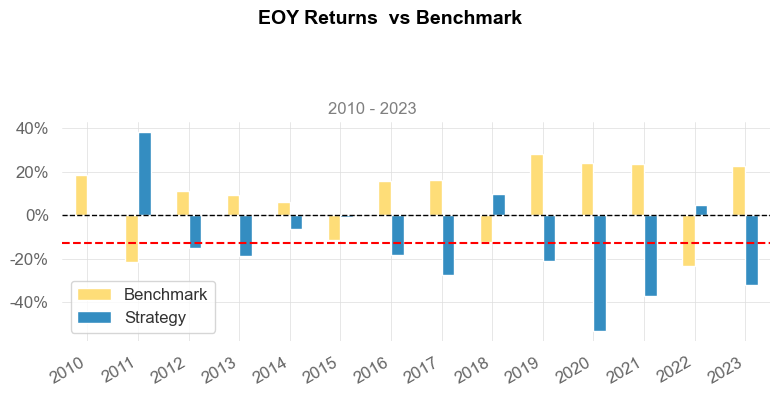

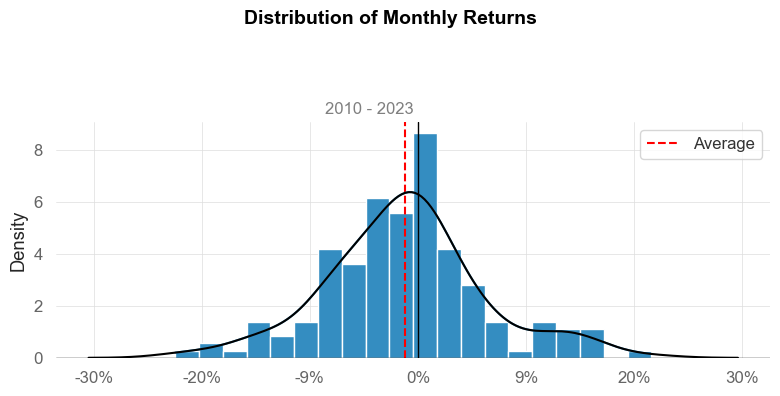

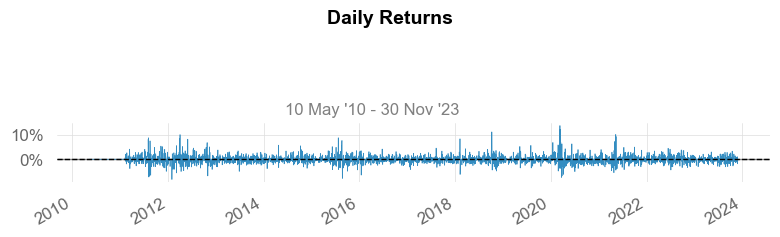

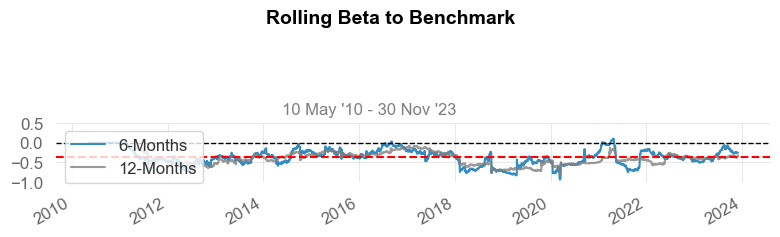

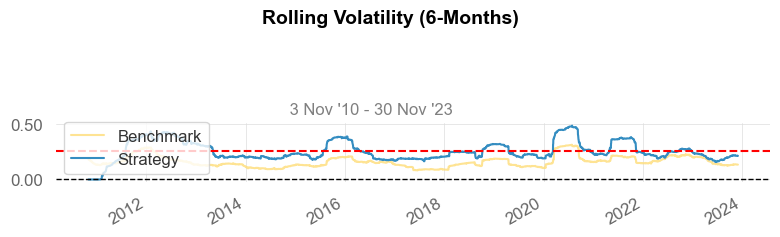

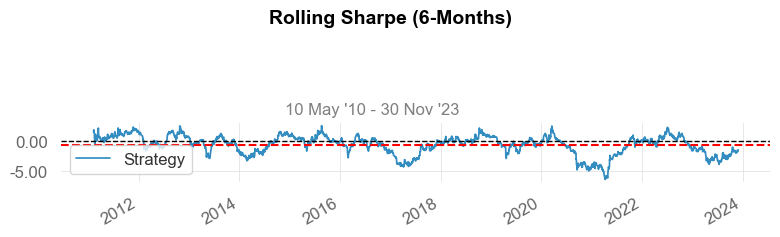

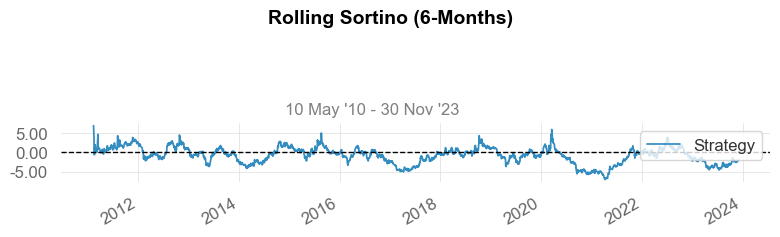

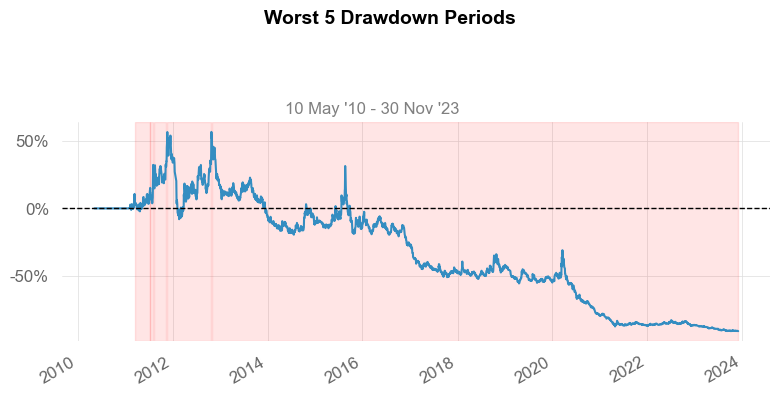

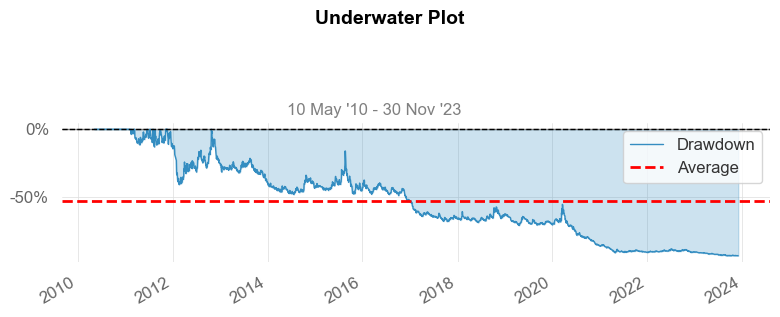

TypeError: pivot() takes 1 positional argument but 4 were given

In [19]:
stocks = 10
top = alpha.apply(lambda row: row.nsmallest(stocks), axis=1).fillna(0)
top_equalweight = top.applymap(lambda x: -1/stocks if x != 0 else 0)
print(top_equalweight.sum(axis=1))
test = top_equalweight.sum(axis =1)
for index, value in test.items():
    if 0.001 < value < 0.975:
        print(f"Error at index {index}: value is {value}")
buy_fee:float=0.001425*0.3
sell_fee:float=0.001425*0.3+0.003
start_time = '2010-05-09' # '2014-05-09'
end_time = '2023-11-30'
weight = top_equalweight.loc[start_time:end_time]
expreturn = exp_returns .loc[start_time:end_time]
delta_weight = weight.shift(1) - weight
buy_fees = delta_weight[delta_weight > 0]*(buy_fee)
buy_fees = buy_fees.fillna(0)
sell_fees = delta_weight.abs()[delta_weight < 0]*(sell_fee)
sell_fees = sell_fees.fillna(0)
fee = buy_fees + sell_fees
daily_fee = fee.sum(axis = 1)
daily_profit = (weight * expreturn).sum(axis=1)
daily_returns = daily_profit - daily_fee

daily_returns.cumsum().plot(title = 'multialpha')

qs.reports.full(daily_returns,Benchmark)

In [17]:
data_list = [#'EPS',
            #'RevenueGrowthRate',
            #'OperatingProfit',
            #'ROA_C_EBITDA',
            #'ROE_A_AfterTax',
            #'NetProfitMargin_AfterTax',
            #'GrossProfitMargin',
            #'GrossOperatingProfit',
            'GrossProfitGrowthRate',
            #'OperatingProfitGrowthRate',
            #'REV_m',
            'REV_G_m',
            # 'REV_G_lm_m',
            #'REV_pers_m',
            # 'NP_pretax_m',
            # 'NP_m',
            # 'NP_pretax_rate_m',
            # 'NP_rate_m',
            # 'NP_pretax_pers_m', 'NP_pers__m'
            ]

final_summary = pd.DataFrame()
correlation_matrix = pd.DataFrame()

for data in data_list:
    try:
        # print(f'EXPRESSION: ts_rank({data},252)')
        alpha = eval(f'ts_rank({data},252)')[small_aum_Filter2]
        # daily_returns, result_summary = bt(alpha, exp_returns,
        #                                strategy='SO',
        #                                buy_fee=0.001425*0.3, sell_fee=0.001425*0.3+0.003,
        #                                start_time='2013-06-01',
        #                                end_time='2023-11-30')
        # final_summary = pd.concat([final_summary, result_summary], axis=0, ignore_index=True)
        # correlation_matrix = pd.concat([correlation_matrix, daily_returns], axis=1, ignore_index = False)

        #qs.reports.full(daily_returns, Benchmark)
        result_weight = weight(alpha, strategy = 'SO')
        pickle_file = os.path.join(rf'{target_folder_path}/', f'W_S_{data}.pkl')
        with open(pickle_file, 'wb') as file:
            pickle.dump(result_weight, file)
    except TypeError as e:
        print(f"遇到錯誤: {e}")
# final_summary.to_csv('sign_LO.csv', index=False)

In [16]:
alpha = eval(f'ts_rank(REV_G_m,252)')[small_aum_Filter2]
#result_weight = weight(alpha)
alpha

symbol,1101,1102,1210,1216,1301,1303,1312,1314,1319,1326,...,8299,8358,8436,8454,9904,9914,9938,9939,9945,9958
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-27,NaN,0.446429,NaN,NaN,0.902778,0.815476,NaN,NaN,0.898810,0.815476,...,0.978175,0.890873,0.660714,NaN,NaN,NaN,0.803571,0.732143,NaN,NaN
2023-11-28,NaN,0.444444,NaN,NaN,0.900794,0.813492,NaN,NaN,0.896825,0.813492,...,0.976190,0.888889,0.658730,NaN,NaN,NaN,0.805556,0.730159,NaN,NaN
2023-11-29,NaN,0.442460,NaN,NaN,0.898810,0.811508,NaN,NaN,0.894841,0.811508,...,0.974206,0.886905,0.656746,NaN,NaN,NaN,0.807540,0.728175,NaN,NaN
2023-11-30,NaN,0.440476,NaN,NaN,0.896825,0.809524,NaN,NaN,0.892857,0.809524,...,0.972222,0.884921,0.654762,NaN,NaN,NaN,0.809524,0.726190,NaN,NaN


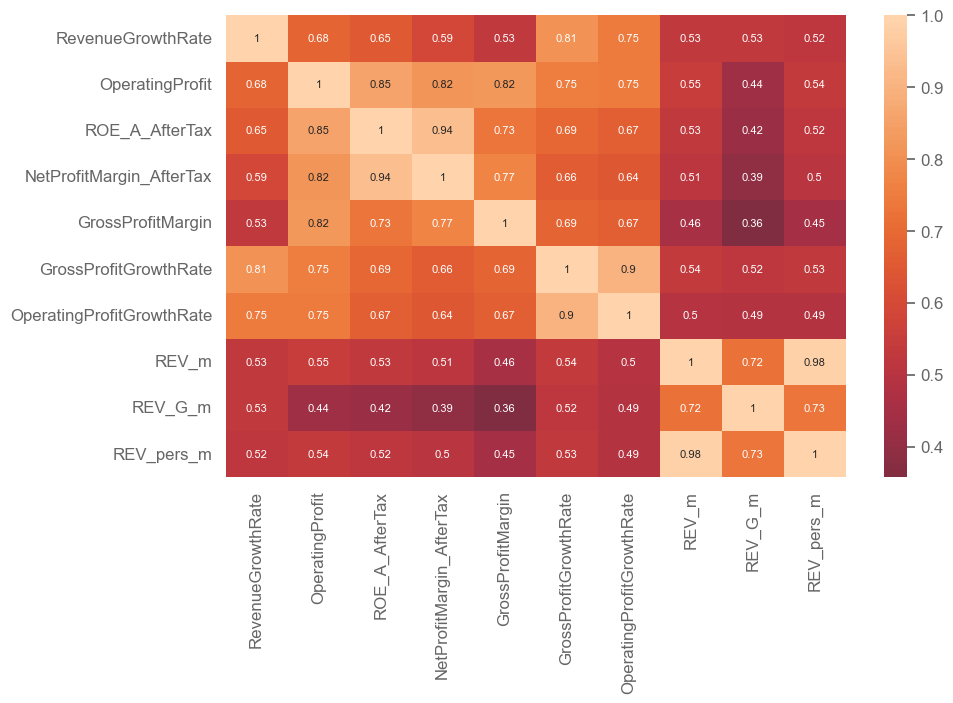

In [83]:
correlation_matrix.columns = data_list
df_corr = correlation_matrix.corr()
sns.heatmap(df_corr, center=0, annot=True, annot_kws={"size": 8})
mp.show()

In [17]:
data_list3 = [RevenueGrowthRate,
            OperatingProfit,
            ROA_C_EBITDA,
            ROE_A_AfterTax,
            NetProfitMargin_AfterTax,
            GrossProfitMargin,
            GrossOperatingProfit,
            GrossProfitGrowthRate,
            OperatingProfitGrowthRate,
            REV_m,
            REV_G_m,
            REV_pers_m]

final_summary = pd.DataFrame()
correlation_matrix = pd.DataFrame()

for data in data_list3:
    try:
        # print(f'EXPRESSION: ts_rank({data},252)')
        alpha = eval(f'ts_rank({data},252)')[small_aum_Filter2]
        daily_returns, result_summary = bt(alpha, exp_returns,
                                       strategy='SO',
                                       buy_fee=0.001425*0.3, sell_fee=0.001425*0.3+0.003,
                                       start_time='2013-06-01',
                                       end_time='2023-11-30')
        # final_summary = pd.concat([final_summary, result_summary], axis=0, ignore_index=True)
        correlation_matrix = pd.concat([correlation_matrix, daily_returns], axis=1, ignore_index = False)

        # qs.reports.full(LS_result, Benchmark)

    except TypeError as e:
        print(f"遇到錯誤: {e}")

SyntaxError: invalid syntax (<string>, line 1)